<a href="https://colab.research.google.com/github/yaicianis/yaicianis-Dog-vs-Cat-Classification-using-Transfer-Learning/blob/main/Dog_vs_Cat_Classification_using_Transfer_Learning_MobileNet_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting Dataset using Kaggle API

In [1]:
# installing the Kaggle library
!pip install kaggle

In [6]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset from kaggle


In [7]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [9]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [10]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [11]:
import os
# counting the number of files in train folder
path,dirs,files= next(os.walk('/content/train'))
file_count=len(files)
print('number of images',file_count)

number of images 25000


printing the name of images

In [12]:
file_name=os.listdir('/content/train')
print(file_name)

['cat.4554.jpg', 'dog.10336.jpg', 'dog.6151.jpg', 'dog.5083.jpg', 'cat.4657.jpg', 'dog.6698.jpg', 'cat.5727.jpg', 'cat.6846.jpg', 'dog.486.jpg', 'dog.10724.jpg', 'cat.7566.jpg', 'cat.10200.jpg', 'dog.4066.jpg', 'dog.9343.jpg', 'cat.3997.jpg', 'dog.9354.jpg', 'dog.4416.jpg', 'cat.11766.jpg', 'cat.1670.jpg', 'dog.3935.jpg', 'dog.7026.jpg', 'cat.1507.jpg', 'dog.8613.jpg', 'cat.10814.jpg', 'dog.5392.jpg', 'cat.1582.jpg', 'dog.6179.jpg', 'dog.5085.jpg', 'dog.10973.jpg', 'cat.4108.jpg', 'dog.1150.jpg', 'cat.7092.jpg', 'dog.1083.jpg', 'dog.8447.jpg', 'cat.9303.jpg', 'dog.9520.jpg', 'dog.10554.jpg', 'cat.6272.jpg', 'cat.8338.jpg', 'dog.11604.jpg', 'dog.11813.jpg', 'dog.1047.jpg', 'cat.5457.jpg', 'dog.1924.jpg', 'dog.4666.jpg', 'dog.389.jpg', 'cat.3319.jpg', 'cat.69.jpg', 'cat.5835.jpg', 'dog.234.jpg', 'dog.6137.jpg', 'dog.10999.jpg', 'cat.5323.jpg', 'dog.8379.jpg', 'cat.701.jpg', 'dog.5599.jpg', 'dog.6614.jpg', 'dog.540.jpg', 'dog.2936.jpg', 'dog.625.jpg', 'dog.8862.jpg', 'cat.86.jpg', 'cat.29

In [13]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow


displaying the images of dogs and cats

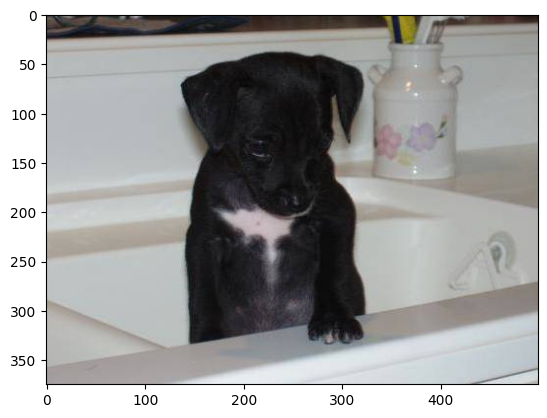

In [14]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
plt.imshow(img)

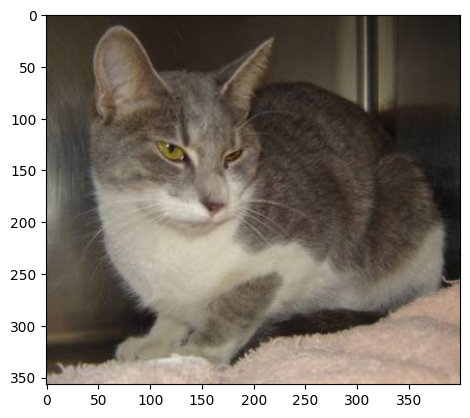

In [15]:
# display cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
plt.imshow(img)

In [16]:
file_name=os.listdir('/content/train')

dog_count=0
cat_count=0

for img_file in file_name:

  name=img_file[0:3]

  if name=='dog':
    dog_count +=1

  else:
     cat_count +=1

print('number of dog images =',dog_count)
print('number of cat images =',cat_count)

number of dog images = 12500
number of cat images = 12500


resizing all the images

In [17]:
# creating directory for resized images
os.mkdir('/content/image resized')

In [20]:
original_folder='/content/train/'
resized_folder='/content/image resized/'

for i in range(2000):

  filename=os.listdir(original_folder)[i]
  img_path =original_folder+filename

  img=Image.open(img_path)
  img=img.resize((224,224))
  img=img.convert('RGB')

  newImgPath=resized_folder+filename
  img.save(newImgPath)



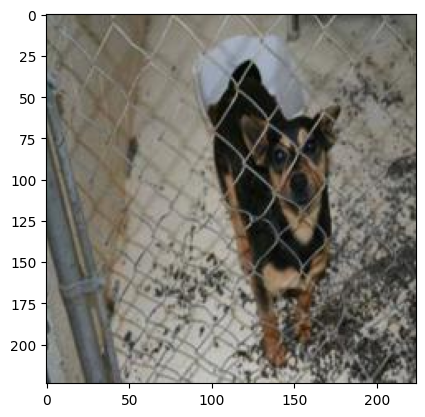

In [21]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.10046.jpg')
imgplt=plt.imshow(img)
plt.show()

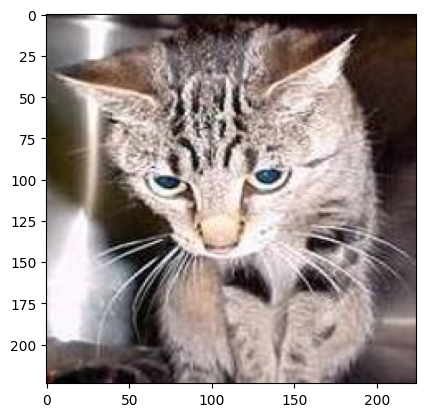

In [22]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.10016.jpg')
imgplt=plt.imshow(img)
plt.show()

creating labels for resized images of dogs and cats

cat-->0
dog-->1

In [23]:
# creating for loop to assign labels
filenames=os.listdir('/content/image resized/')

labels=[]

for i in range(2000):

  file_name=filenames[i]
  label=file_name[0:3]

  if label=='dog':
    labels.append(1)

  else:
       labels.append(0)




In [24]:
print(labels[0:5])
print(len(labels))

[0, 1, 1, 1, 0]
2000


In [25]:
#couting the images of dogs and cats out of 2000 images
values,counts=np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[ 979 1021]


converting all the reseized images to numpy arrays

In [26]:
import cv2
import glob

In [27]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [28]:
print(dog_cat_images)

[[[[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  ...

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]]


 [[[ 42 179 171]
   [ 47 184 176]
   [ 55 192 184]
   ...
   [110 209 213]
   [107 206 210]
   [124 223 227]]

  [[ 51 188 180]
   [ 55 192 184]
   [ 61 198 190]
   ...
   [117 216 220]
   [108 207 211]
   [116 215 219]]

  [[ 59 196 188]
   [ 62 199 191]
   [ 65 202 194]
   ...
   [114 214 219]
   [103 203 208]
   [102 202

In [29]:
type(dog_cat_images)

numpy.ndarray

In [30]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [31]:
x=dog_cat_images
y=np.asarray(labels)

train test split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [33]:
print(x.shape,x_train.shape,x_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600--->training images

400-->test images

In [34]:
# scaling the data
x_train_scaled=x_train/255

x_test_scaled=x_test/255


In [35]:
print(x_train_scaled)

[[[[0.49411765 0.44705882 0.47058824]
   [0.56862745 0.52156863 0.54509804]
   [0.52156863 0.48235294 0.50588235]
   ...
   [0.38823529 0.33333333 0.34901961]
   [0.48627451 0.43921569 0.4627451 ]
   [0.5254902  0.47843137 0.50196078]]

  [[0.50588235 0.45882353 0.48235294]
   [0.55686275 0.50980392 0.53333333]
   [0.51764706 0.47843137 0.50196078]
   ...
   [0.37647059 0.32156863 0.3372549 ]
   [0.46666667 0.41960784 0.44313725]
   [0.49411765 0.44705882 0.47058824]]

  [[0.51372549 0.46666667 0.49019608]
   [0.52941176 0.48235294 0.50588235]
   [0.49803922 0.45882353 0.48235294]
   ...
   [0.39607843 0.34117647 0.35686275]
   [0.47843137 0.43137255 0.45490196]
   [0.49019608 0.44313725 0.46666667]]

  ...

  [[0.41568627 0.39215686 0.41176471]
   [0.40392157 0.38039216 0.4       ]
   [0.40392157 0.38039216 0.4       ]
   ...
   [0.25882353 0.2745098  0.34901961]
   [0.25490196 0.27843137 0.35294118]
   [0.30980392 0.33333333 0.40784314]]

  [[0.41960784 0.39607843 0.41568627]
   [0.4

building the neural network

In [44]:
import tensorflow as tf
import tensorflow_hub as hub

mobilenet_model_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

# Load the MobileNetV2 model
pretrained_model = hub.KerasLayer(mobilenet_model_url, input_shape=(224, 224, 3), trainable=False)

num_of_classes = 2

# Create a Keras model using the pretrained model
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes, activation='softmax')
])

# Print the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1001)              3540265   
                                                                 
 dense_2 (Dense)             (None, 2)                 2004      
                                                                 
Total params: 3542269 (13.51 MB)
Trainable params: 2004 (7.83 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


In [50]:
import tensorflow as tf
import tensorflow_hub as hub



# URL for MobileNetV2 model
mobilenet_model_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

# Load the MobileNetV2 model
pretrained_model = hub.KerasLayer(mobilenet_model_url, input_shape=(224, 224, 3), trainable=False)

# Number of output classes
num_of_classes = 2

# Create a Keras model using the pretrained model
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

# Print the model summary
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_7 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_6 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [53]:
model.fit(x_train_scaled,y_train,epochs=5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


50/50 [==============================] - 82s 1s/step - loss: 0.2359 - acc: 0.8956
Epoch 2/5
50/50 [==============================] - 71s 1s/step - loss: 0.0871 - acc: 0.9719
Epoch 3/5
50/50 [==============================] - 72s 1s/step - loss: 0.0691 - acc: 0.9744
Epoch 4/5
50/50 [==============================] - 73s 1s/step - loss: 0.0541 - acc: 0.9781
Epoch 5/5
50/50 [==============================] - 69s 1s/step - loss: 0.0457 - acc: 0.9844


In [54]:
score,acc=model.evaluate(x_test_scaled,y_test)
print('test loss=',score)
print('test accuracy=',acc)

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


13/13 [==============================] - 20s 1s/step - loss: 0.0497 - acc: 0.9900
test loss= 0.04967782646417618
test accuracy= 0.9900000095367432


predictive system

path of the image to be predicted/content/dog1.jpg


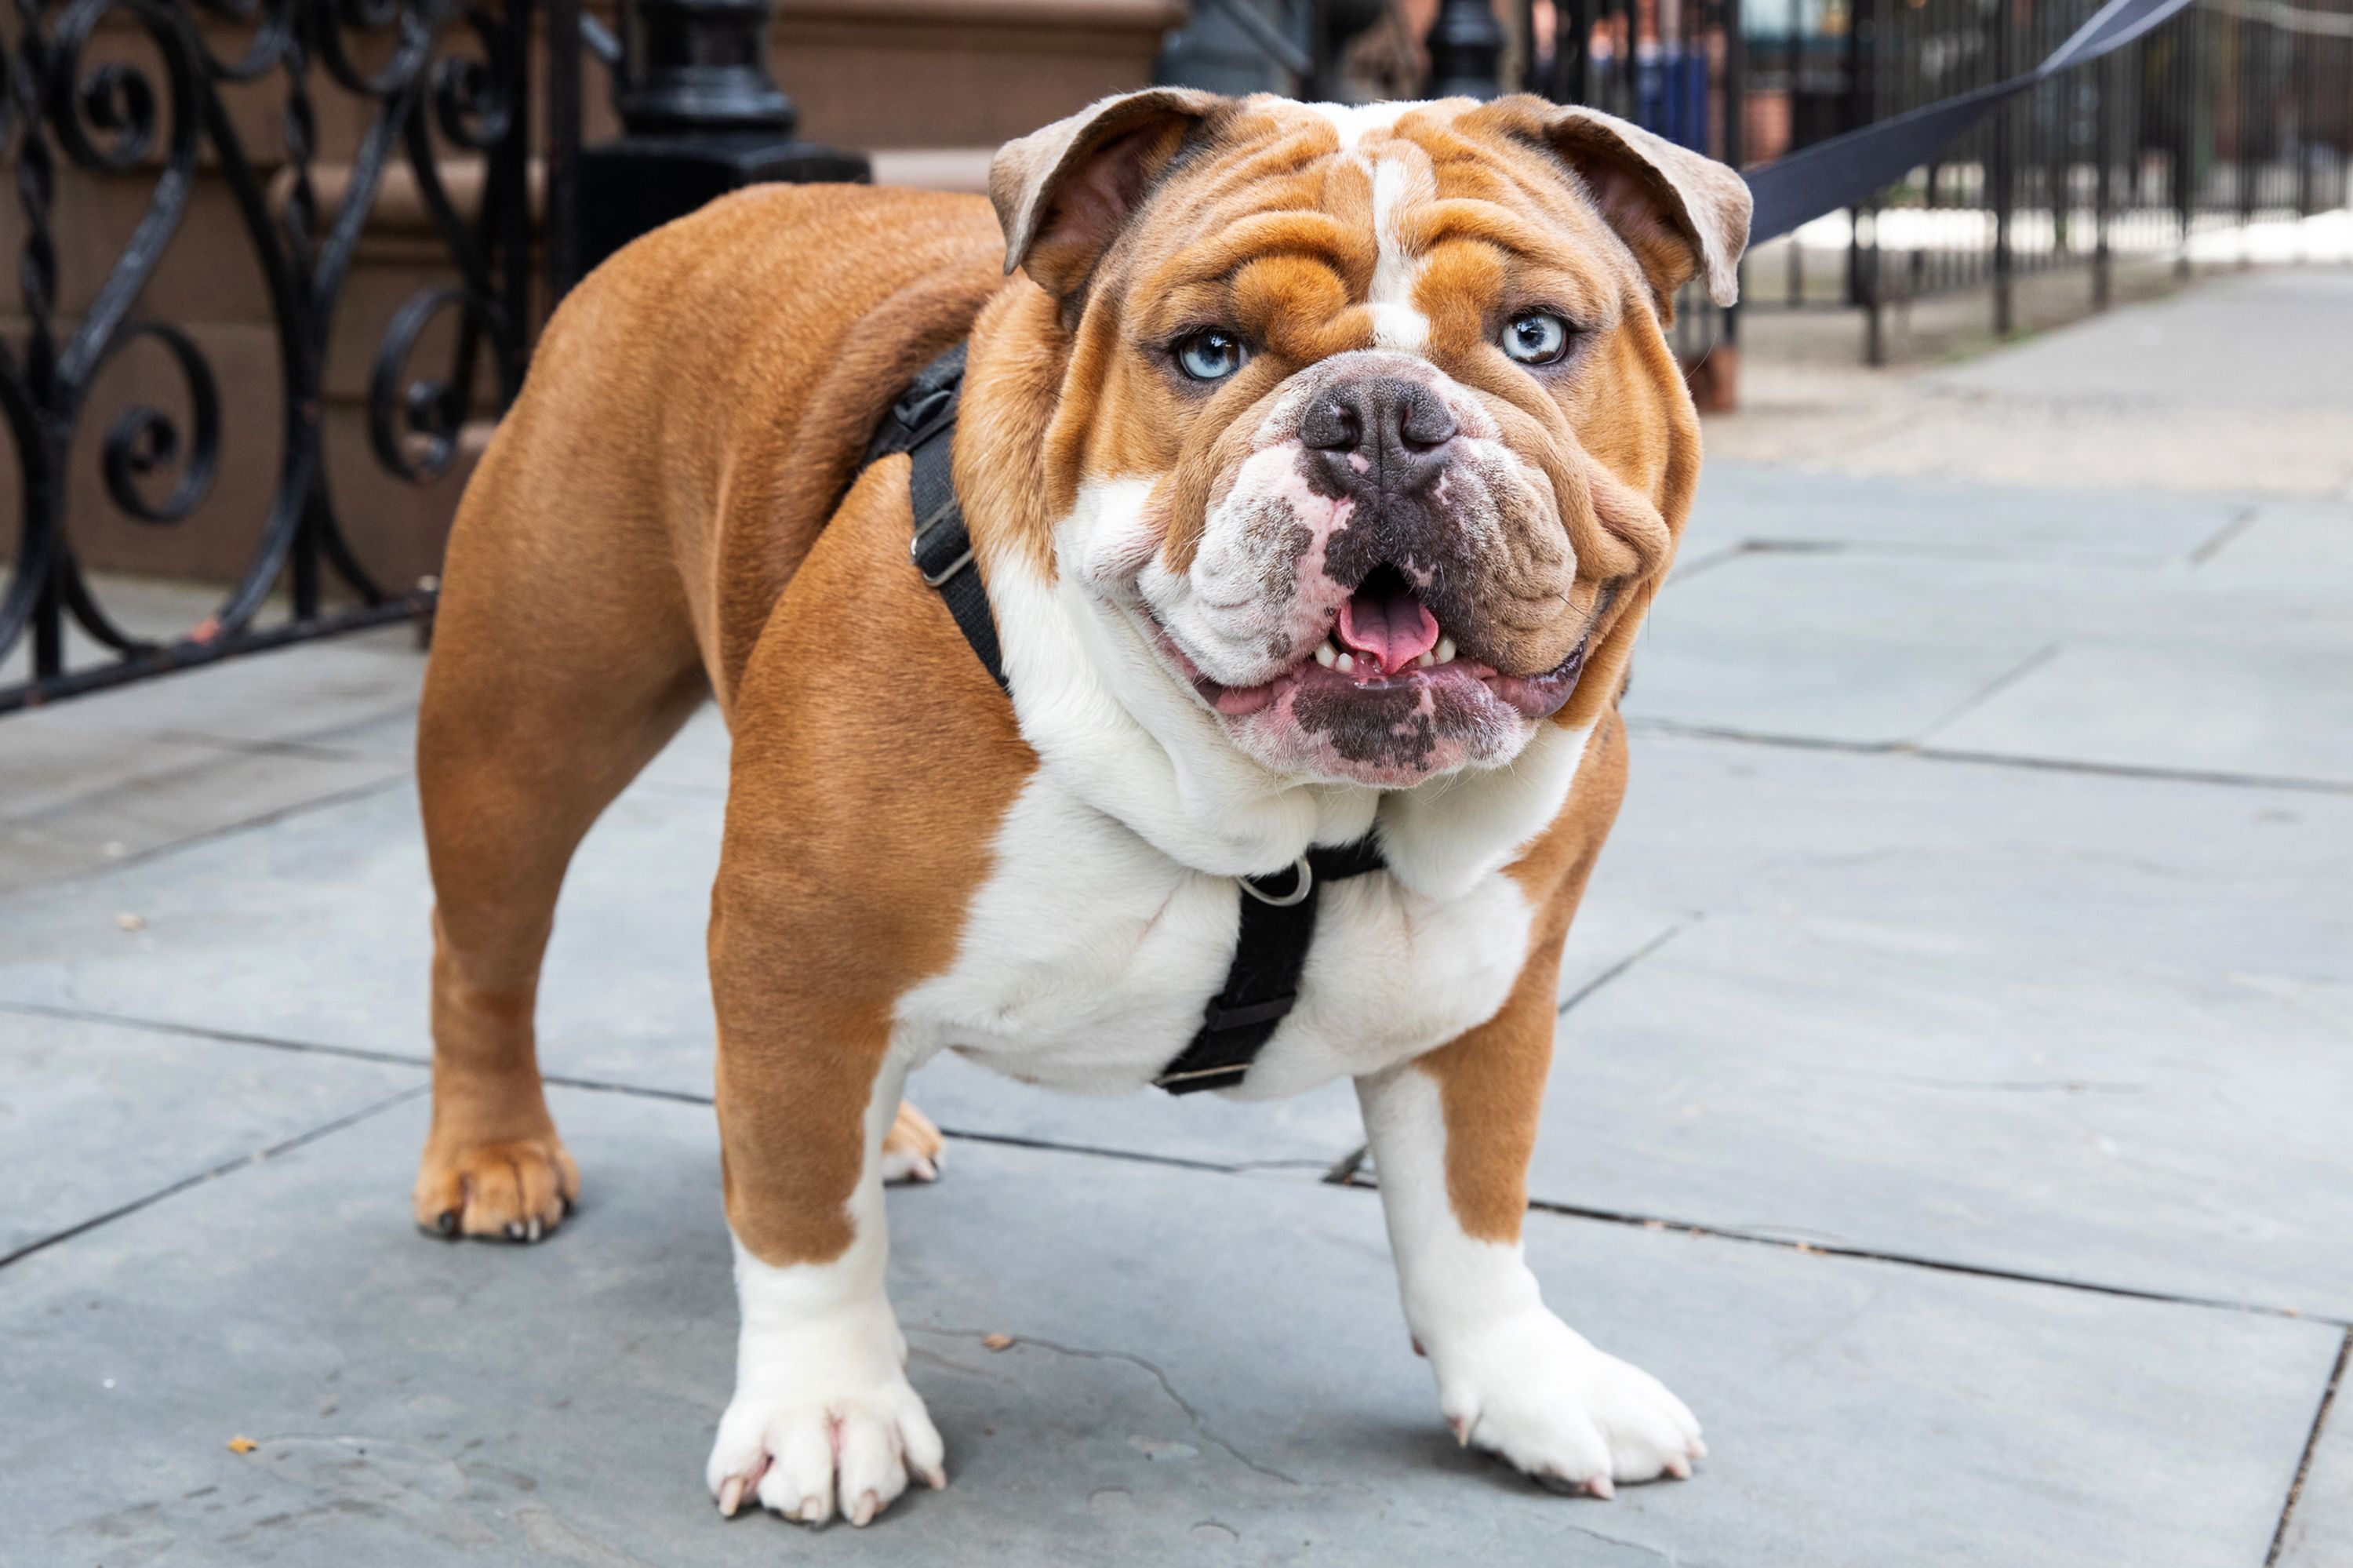

1/1 [==============================] - 0s 151ms/step
the image represents a dog


In [57]:
  input_image_path=input('path of the image to be predicted')
  input_image=cv2.imread(input_image_path)

  cv2_imshow(input_image)

  input_image_resize=cv2.resize(input_image, (224,224))

  input_image_scaled=  input_image_resize/255

  image_reshaped=np.reshape(input_image_scaled,[1,224,224,3])

  input_prediction= model.predict(image_reshaped)

  input_pred_label=np.argmax(input_prediction)

  if input_pred_label ==0:
    print('the image represents a cat')
  else:
    print('the image represents a dog')



path of the image to be predicted/content/cat1.jpg


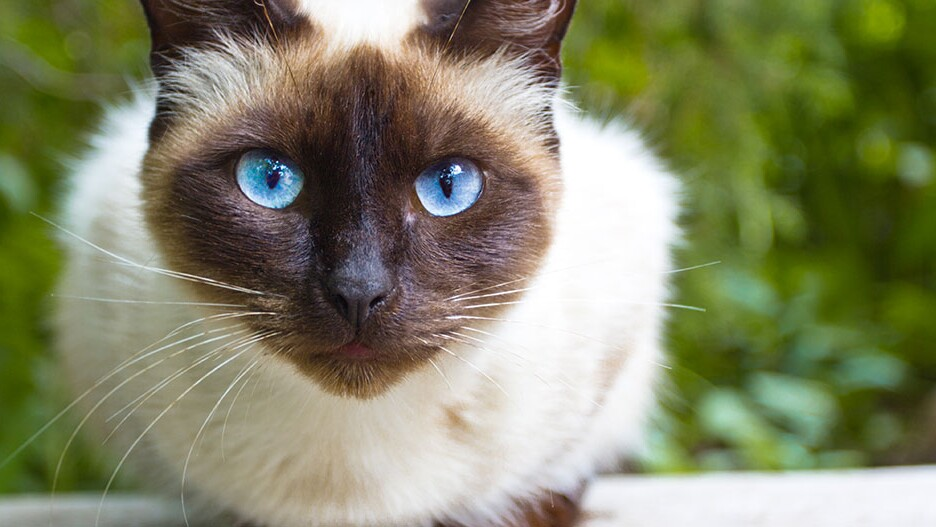

1/1 [==============================] - 0s 86ms/step
the image represents a cat


In [58]:
  input_image_path=input('path of the image to be predicted')
  input_image=cv2.imread(input_image_path)

  cv2_imshow(input_image)

  input_image_resize=cv2.resize(input_image, (224,224))

  input_image_scaled=  input_image_resize/255

  image_reshaped=np.reshape(input_image_scaled,[1,224,224,3])

  input_prediction= model.predict(image_reshaped)

  input_pred_label=np.argmax(input_prediction)

  if input_pred_label ==0:
    print('the image represents a cat')
  else:
    print('the image represents a dog')
